In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

/home/joaomonteiro/Desktop/BIOINF/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X = pd.read_csv("/home/joaomonteiro/Desktop/BIOINF/trabalho2/data/X_gexp.csv", index_col=0)
y = pd.read_csv("/home/joaomonteiro/Desktop/BIOINF/trabalho2/data/y_gexp.csv", index_col=0)

In [3]:
X.head()

,FSTL1,ELMO2,CREB3L1,PNMA1,MMP2,SMARCD3,PKNOX2,RALYL,ZHX3,APBB2,...,ST18,PSMB9,ProSAPiP1,HCLS1,MMP9,KIAA0802,DHRS2,SGEF,PIK3IP1,CTSC
TCGA-02-0001-01,2.275179,1.873549,1.772059,2.144198,2.269443,1.742389,1.797055,1.677848,1.801352,1.786488,...,1.669895,2.346811,2.004333,2.213310,2.407606,2.083333,2.098461,1.680092,1.953595,2.429578
TCGA-02-0004-01,2.569520,2.085888,1.961846,2.315705,2.505400,2.226593,1.798769,1.671170,2.000942,2.089285,...,1.516024,2.339930,2.045828,2.285701,2.633632,1.938474,1.614437,1.760419,2.010156,2.431814
TCGA-02-0009-01,2.471492,2.030865,1.845808,2.072279,2.346815,1.783762,1.707150,1.599492,1.823480,1.778307,...,1.527561,2.302006,2.059862,2.130193,2.349831,1.815239,1.857933,1.675823,2.011970,2.434026
TCGA-02-0015-01,2.464403,2.094165,1.762169,2.374129,2.213562,2.209426,1.925440,1.936043,2.003743,2.024847,...,1.611626,2.208924,2.050555,2.213955,1.982603,2.125508,1.631955,1.881003,1.886280,2.450704
TCGA-02-0016-01,2.365457,2.188070,1.763206,2.340024,2.219210,2.308335,1.801007,1.756726,2.115714,2.086733,...,1.570489,2.187420,2.265522,2.192262,1.796491,1.979615,1.637215,2.182186,1.897957,2.140727


In [4]:
y.head()

,x
TCGA-02-0001-01,0
TCGA-02-0004-01,1
TCGA-02-0009-01,0
TCGA-02-0015-01,0
TCGA-02-0016-01,0


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/home/joaomonteiro/Desktop/BIOINF/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joaomonteiro/Desktop/BIOINF/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [8]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [9]:
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

In [10]:
results = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'UMAP1': X_umap[:, 0],
    'UMAP2': X_umap[:, 1],
    'KMeans': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'TrueLabel': y.values.ravel()
})


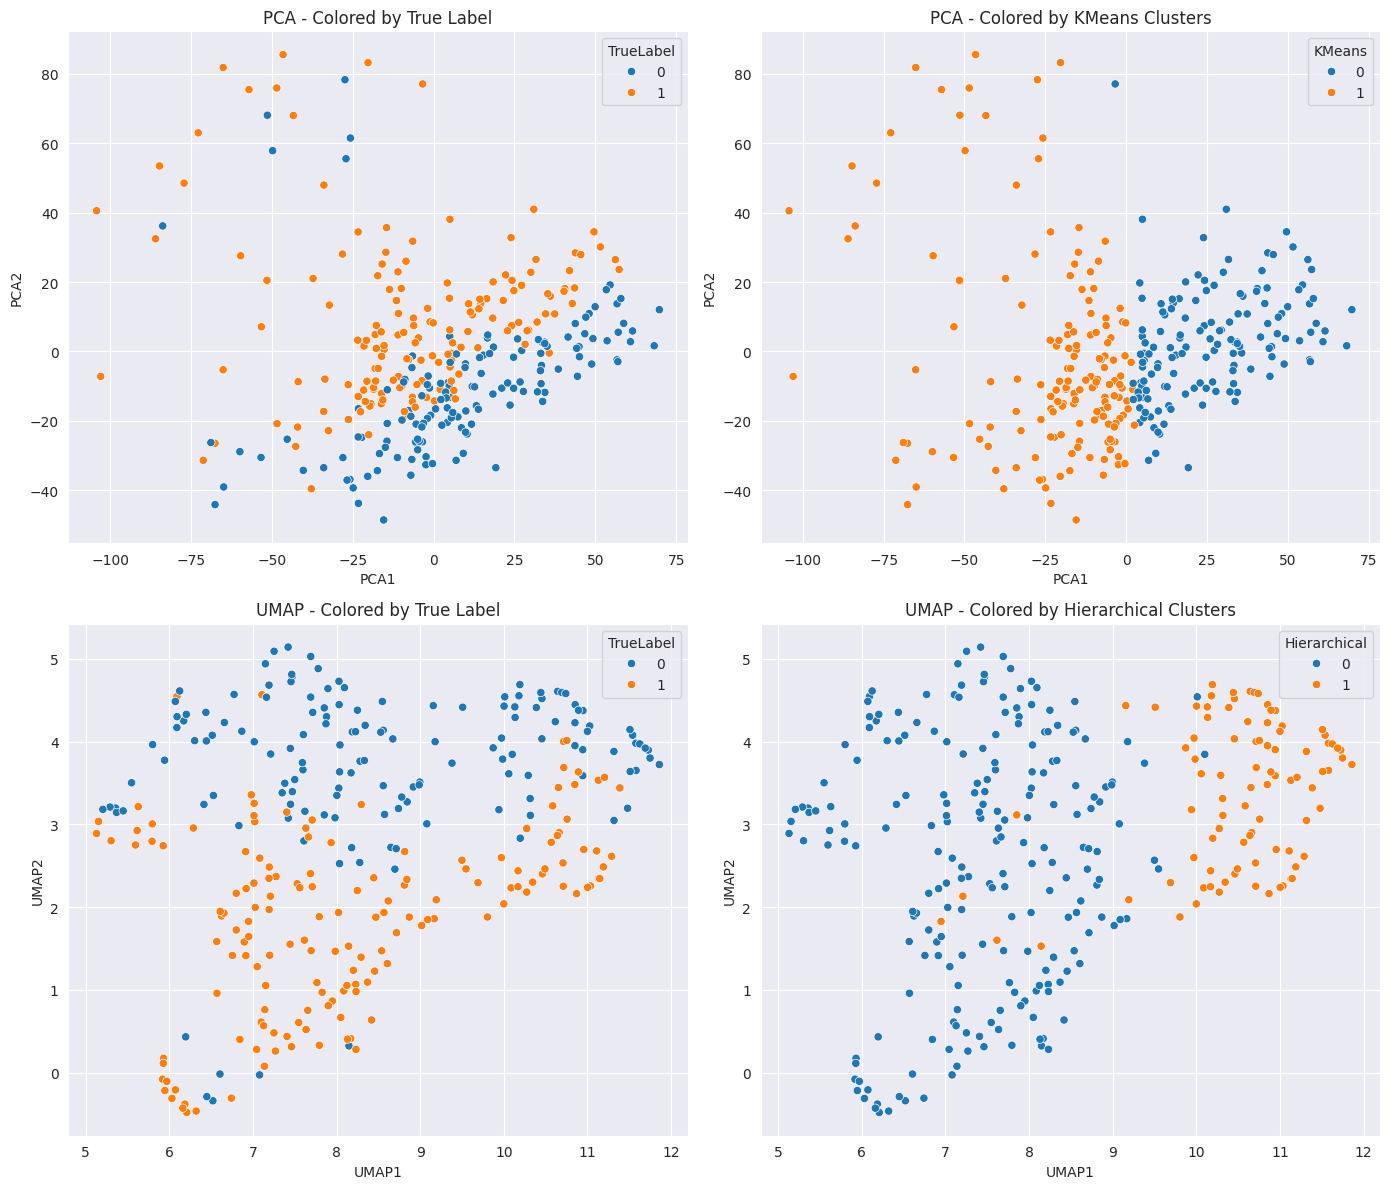

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.scatterplot(data=results, x='PCA1', y='PCA2', hue='TrueLabel', ax=axes[0, 0])
axes[0, 0].set_title('PCA - Colored by True Label')

sns.scatterplot(data=results, x='PCA1', y='PCA2', hue='KMeans', ax=axes[0, 1])
axes[0, 1].set_title('PCA - Colored by KMeans Clusters')

sns.scatterplot(data=results, x='UMAP1', y='UMAP2', hue='TrueLabel', ax=axes[1, 0])
axes[1, 0].set_title('UMAP - Colored by True Label')

sns.scatterplot(data=results, x='UMAP1', y='UMAP2', hue='Hierarchical', ax=axes[1, 1])
axes[1, 1].set_title('UMAP - Colored by Hierarchical Clusters')

plt.tight_layout()
plt.show()